### Библиотеки

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Данные

In [100]:
df = pd.read_csv('data_after_processing.csv', encoding='utf-8',)

### Первый взгляд

In [101]:
print(df.shape)
print(df.info())
display(df.head())

(3256, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   price                                      3256 non-null   int64  
 1   avg_rating                                 3256 non-null   float64
 2   cnt_reviews                                3256 non-null   int64  
 3   title                                      3256 non-null   object 
 4   pages_cnt                                  3256 non-null   int64  
 5   tirage                                     3256 non-null   int64  
 6   weight                                     3256 non-null   float64
 7   author_Джейн Остен                         3256 non-null   float64
 8   author_Джек Лондон                         3256 non-null   float64
 9   author_Джордж Оруэлл                       3256 non-null   float64
 10  author_Другой

price  avg_rating  cnt_reviews                     title  pages_cnt  \
0    312         4.1          925             Скорбь Сатаны        512   
1    312         4.1         1341      1984 (новый перевод)        320   
2    303         4.2         1288  Преступление и наказание        672   
3    284         4.5          363       Человек недостойный        192   
4    413         4.2         1269              Три товарища        480   

   tirage  weight  author_Джейн Остен  author_Джек Лондон  \
0   30000   250.0                 0.0                 0.0   
1   30000   200.0                 0.0                 0.0   
2   30000   319.0                 0.0                 0.0   
3   25000   132.0                 0.0                 0.0   
4   30000   300.0                 0.0                 0.0   

   author_Джордж Оруэлл  ...  reading_age_12+  reading_age_16+  \
0                   0.0  ...              0.0              1.0   
1                   1.0  ...              0.0              1.0   
2                   0.0  ...              1.0              0.0   
3                   0.0  ...              0.0              1.0   
4                   0.0  ...              1.0              0.0   

   reading_age_18+  reading_age_6+  is_russian_author_0  is_russian_author_1  \
0              0.0             0.0                  1.0                  0.0   
1              0.0             0.0                  1.0                  0.0   
2              0.0             0.0                  0.0                  1.0   
3              0.0             0.0                  1.0                  0.0   
4              0.0             0.0                  1.0                  0.0   

   thickness  width  length  volume  
0        2.1   11.5    18.0   434.7  
1        2.4   11.5    18.0   496.8  
2        2.5   17.5    18.0   787.5  
3        1.5   11.5    18.0   310.5  
4        2.5   11.6    18.1   524.9  

[5 rows x 43 columns]

### Пропуски

In [102]:
print("\nПропуски по столбцам:")
print(df.isnull().sum().sort_values(ascending=False))


Пропуски по столбцам:
price                                        0
reading_age_0+                               0
publication_year_2022                        0
publication_year_2023                        0
publication_year_2024                        0
publication_year_2025                        0
publication_year_Другой                      0
cover_type_Мягкий заламинированный картон    0
cover_type_Мягкий переплёт                   0
cover_type_Твёрдый переплёт                  0
reading_age_12+                              0
publisher_Эксмо                              0
reading_age_16+                              0
reading_age_18+                              0
reading_age_6+                               0
is_russian_author_0                          0
is_russian_author_1                          0
thickness                                    0
width                                        0
length                                       0
publication_year_2021                

### Describe

In [103]:
numeric_cols = ['price', 'avg_rating', 'cnt_reviews', 'pages_cnt', 'tirage', 
                'weight', 'thickness', 'width', 'length', 'volume']

for col in numeric_cols:
    df[f'log_{col}'] = np.log(df[col])

log_numeric_cols = [f'log_{col}' for col in numeric_cols]

display(df[numeric_cols].describe().T)

display(df[log_numeric_cols].describe().T)

count         mean          std      min     25%     50%  \
price        3256.0   548.036855   364.849171  104.000   299.0   395.0   
avg_rating   3256.0     4.364926     0.379528    2.500     4.1     4.3   
cnt_reviews  3256.0    77.959767   141.722742    1.000    10.0    37.5   
pages_cnt    3256.0   475.360872   241.138565   80.000   320.0   416.0   
tirage       3256.0  4106.167076  3021.607570  400.000  3000.0  3000.0   
weight       3256.0   385.688268   259.687237   10.000   230.0   310.0   
thickness    3256.0     2.485135     0.990313    0.600     1.8     2.3   
width        3256.0    12.665387     2.715235    0.100    11.5    12.5   
length       3256.0    19.509951     1.707977    2.400    18.0    20.0   
volume       3256.0   638.028735   375.898027    6.402   414.0   558.9   

                  75%       max  
price         671.000   4599.00  
avg_rating      4.700      5.00  
cnt_reviews    90.000   3004.00  
pages_cnt     576.000   2720.00  
tirage       4000.000  30000.00  
weight        440.000   2840.00  
thickness       2.900     13.50  
width          13.200    143.50  
length         20.600     41.70  
volume        752.778   9755.13

count      mean       std       min       25%       50%  \
log_price        3256.0  6.154275  0.516576  4.644391  5.700444  5.978886   
log_avg_rating   3256.0  1.469789  0.087632  0.916291  1.410987  1.458615   
log_cnt_reviews  3256.0  3.434785  1.456905  0.000000  2.302585  3.624252   
log_pages_cnt    3256.0  6.060945  0.444343  4.382027  5.768321  6.030685   
log_tirage       3256.0  8.175189  0.492974  5.991465  8.006368  8.006368   
log_weight       3256.0  5.793137  0.546540  2.302585  5.438079  5.736572   
log_thickness    3256.0  0.844570  0.356339 -0.510826  0.587787  0.832909   
log_width        3256.0  2.529129  0.147378 -2.302585  2.442347  2.525729   
log_length       3256.0  2.966516  0.101924  0.875469  2.890372  2.995732   
log_volume       3256.0  6.340215  0.476139  1.856610  6.025866  6.325971   

                      75%        max  
log_price        6.508769   8.433594  
log_avg_rating   1.547563   1.609438  
log_cnt_reviews  4.499810   8.007700  
log_pages_cnt    6.356108   7.908387  
log_tirage       8.294050  10.308953  
log_weight       6.086775   7.951559  
log_thickness    1.064711   2.602690  
log_width        2.580217   4.966335  
log_length       3.025291   3.730501  
log_volume       6.623770   9.185549

### Гистограммы

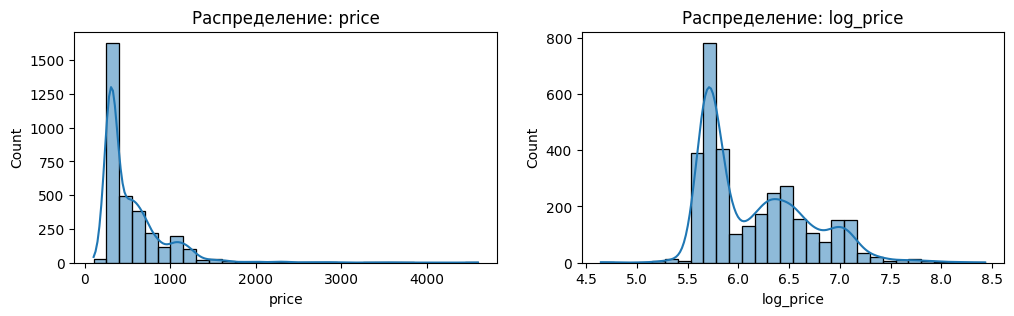

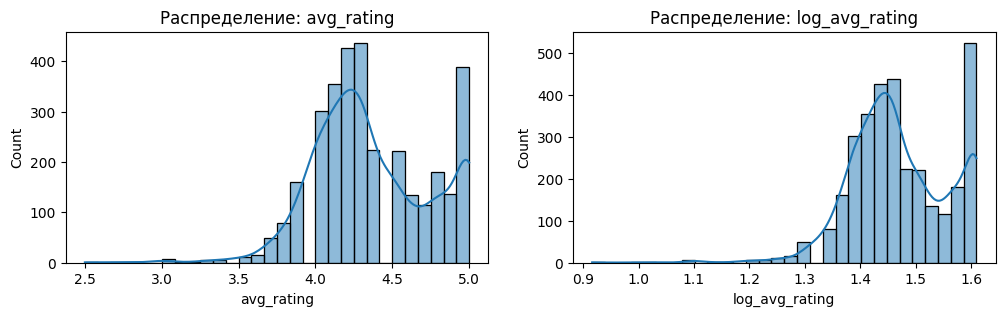

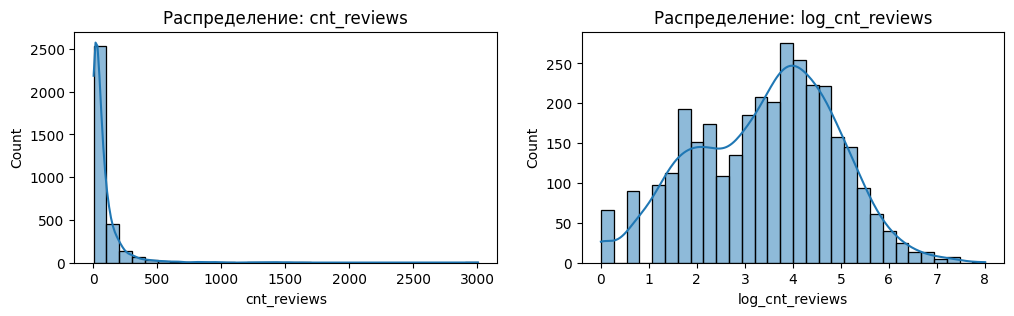

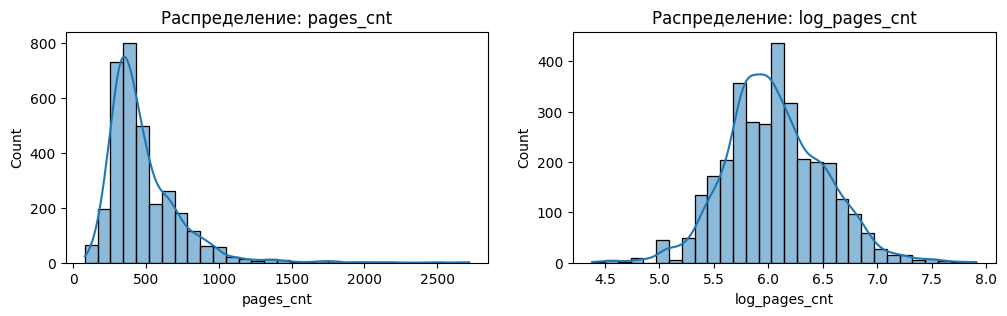

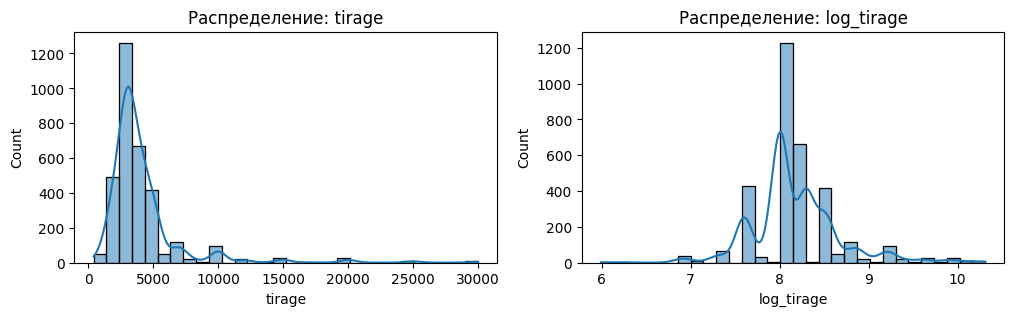

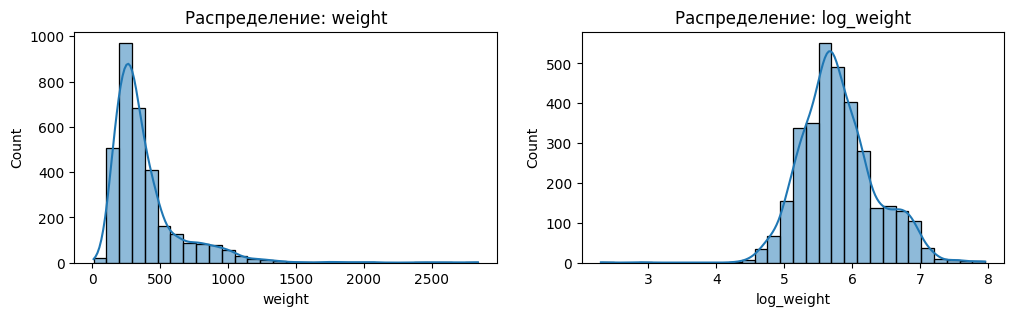

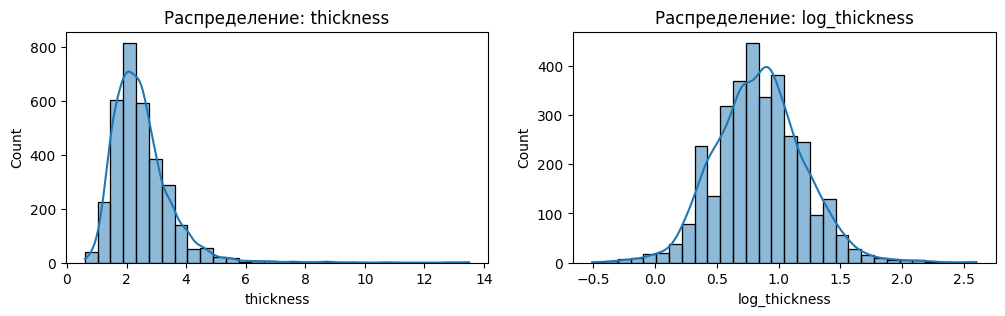

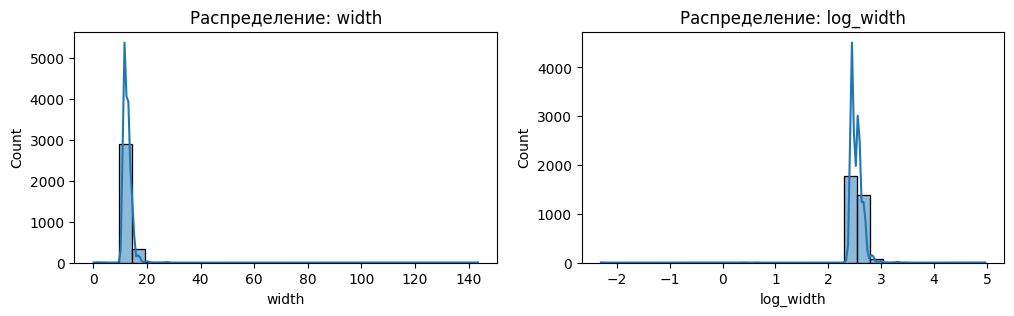

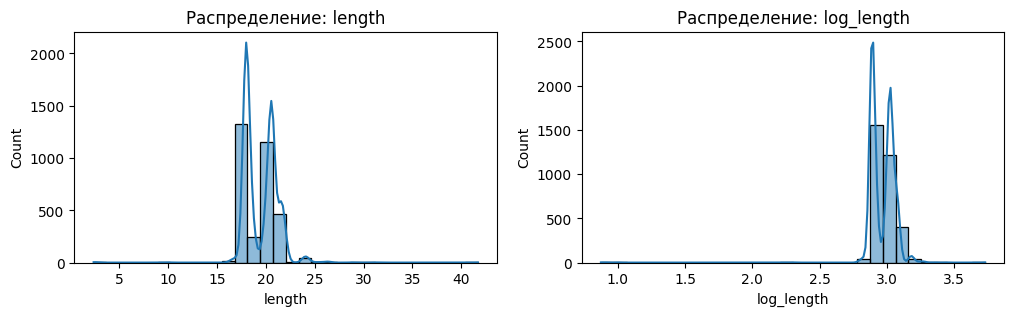

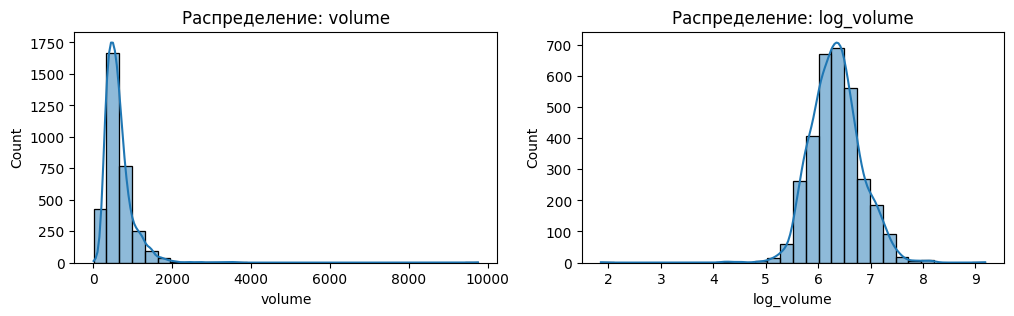

In [104]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    ax[0].set_title(f'Распределение: {col}')
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])

    ax[1].set_title(f'Распределение: {log_col}')
    sns.histplot(df[log_col], bins=30, kde=True, ax=ax[1])
    
    plt.show()

### Боксплоты для выбросов

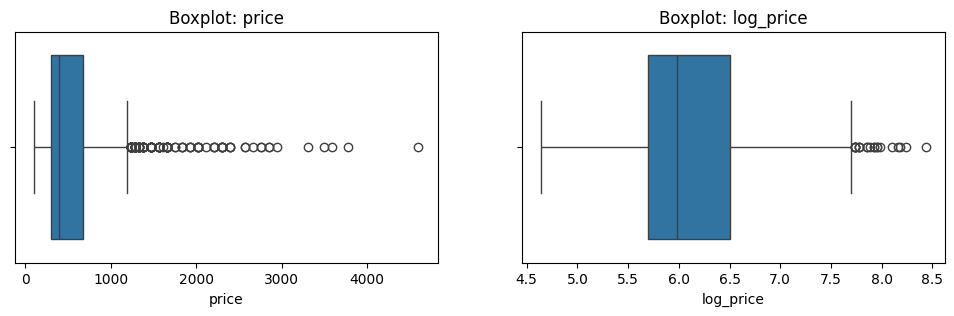

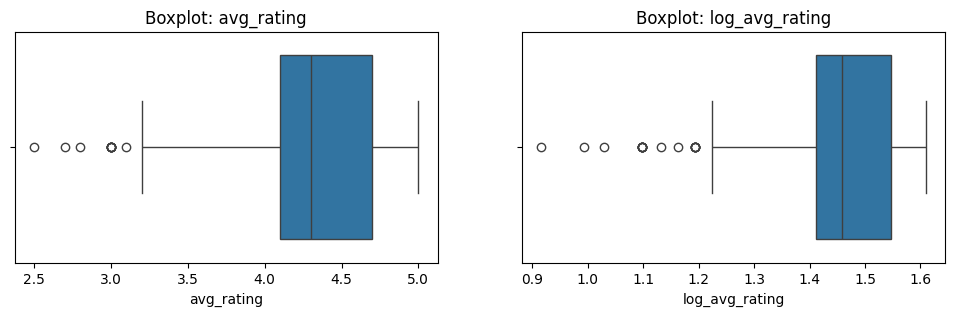

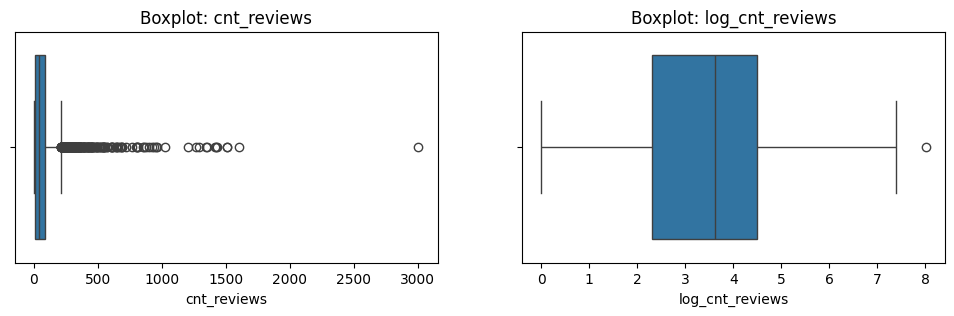

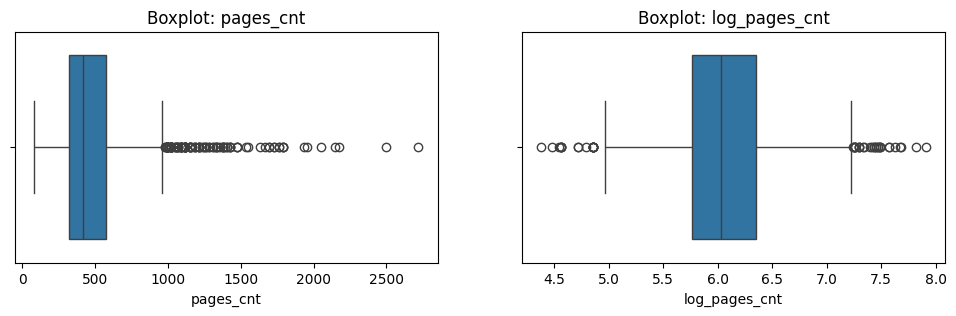

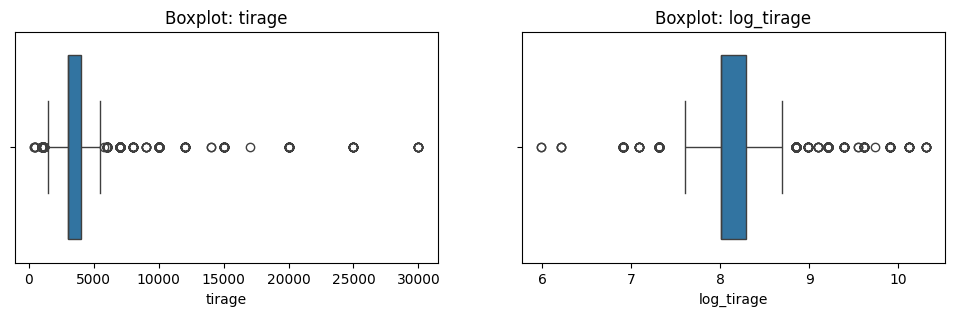

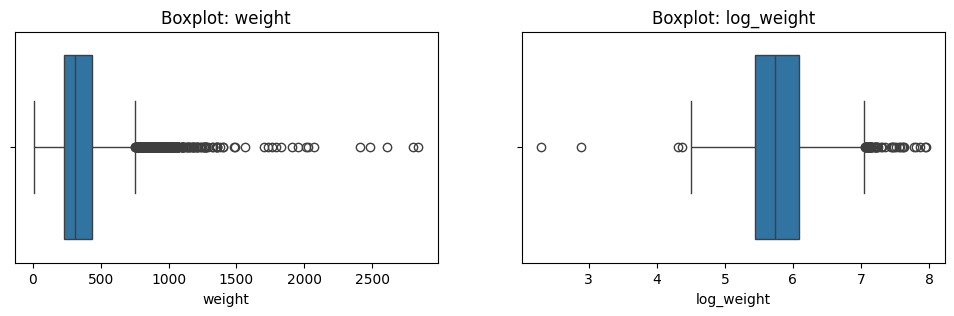

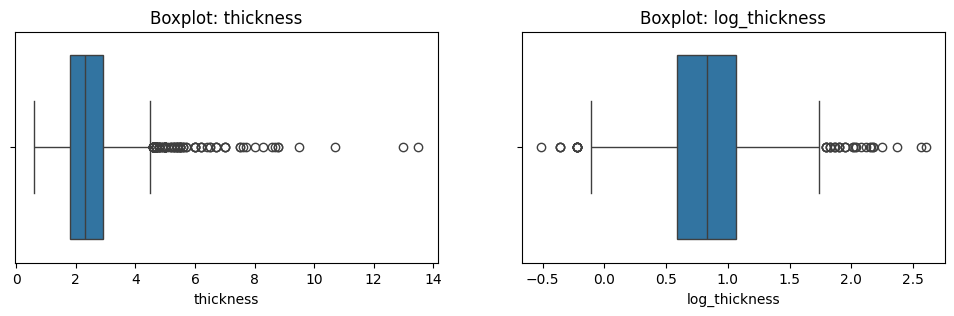

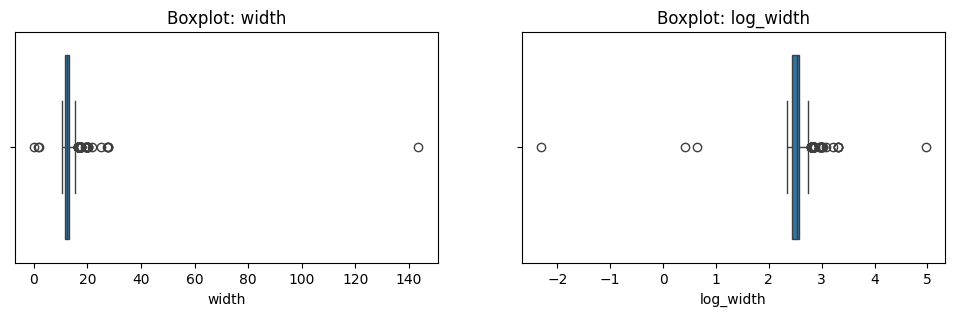

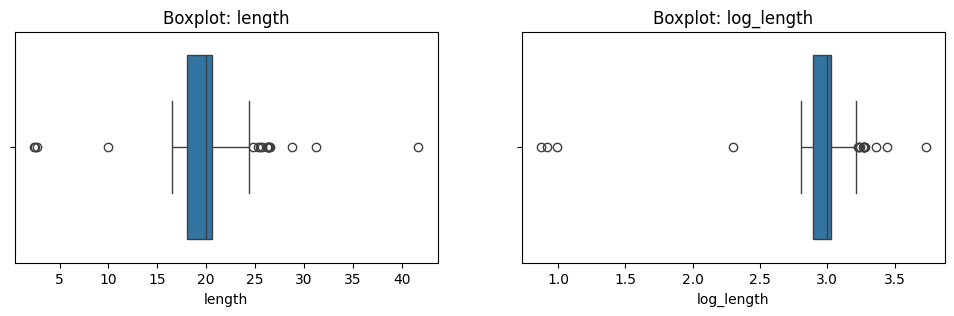

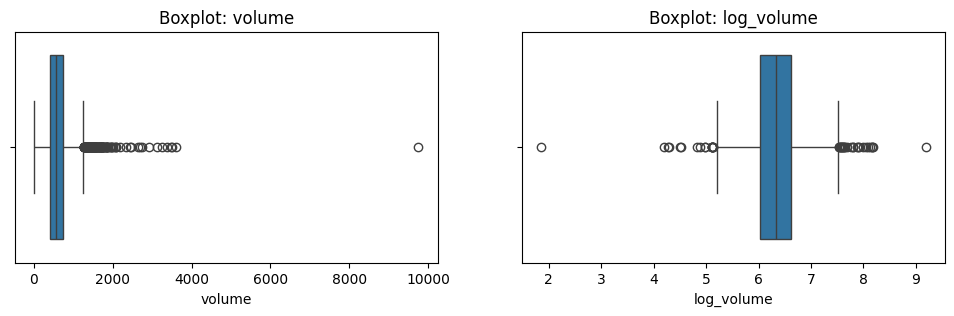

In [105]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

    sns.boxplot(x=df[col], orient='h', ax=ax[0])
    sns.boxplot(x=df[log_col], orient='h', ax=ax[1])

    ax[0].set_title(f'Boxplot: {col}')
    ax[1].set_title(f'Boxplot: {log_col}')

### Корреляционная матрица

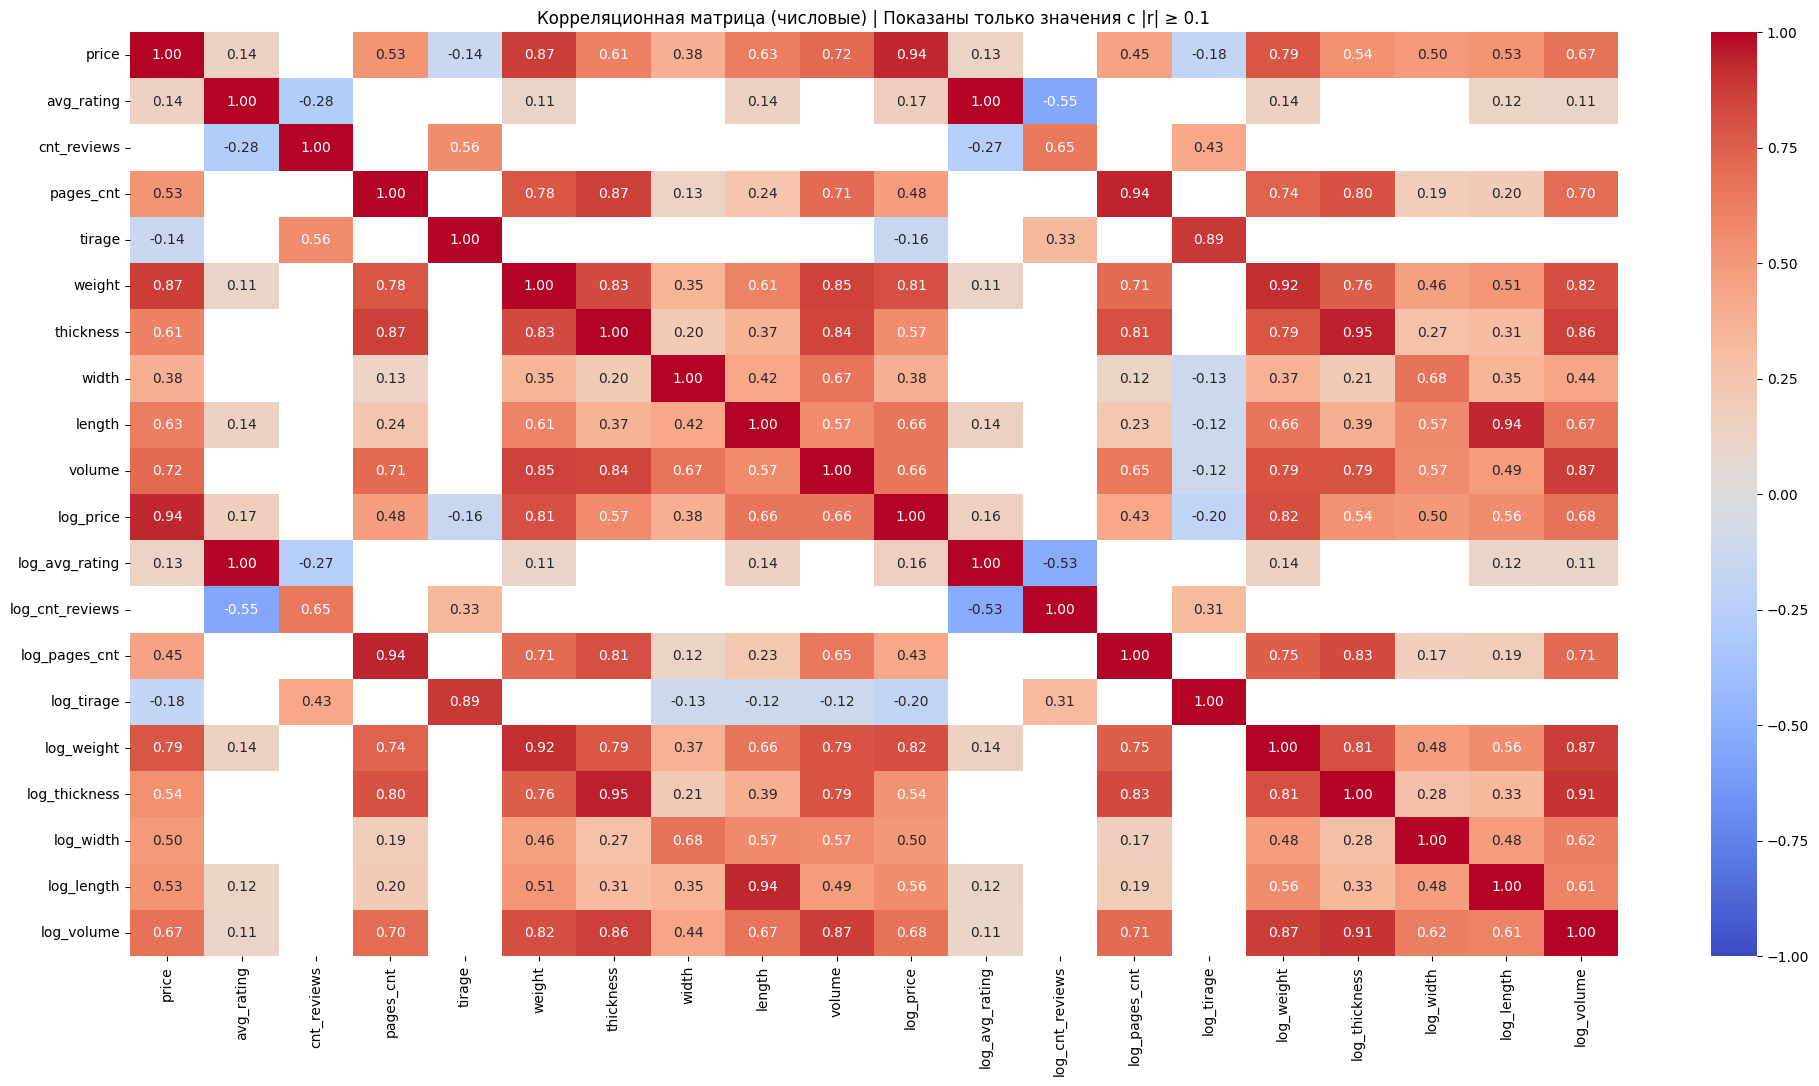

In [106]:
# Вычисляем матрицу корреляций
corr_matrix = df[numeric_cols + log_numeric_cols].corr()

# Создаем маску для незначительных значений
mask = np.abs(corr_matrix) < 0.1

plt.figure(figsize=(24, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,          
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, 
    vmax=1,
)
plt.title('Корреляционная матрица (числовые) | Показаны только значения с |r| ≥ 0.1')
plt.show()

### Зависимость цены от числового признака

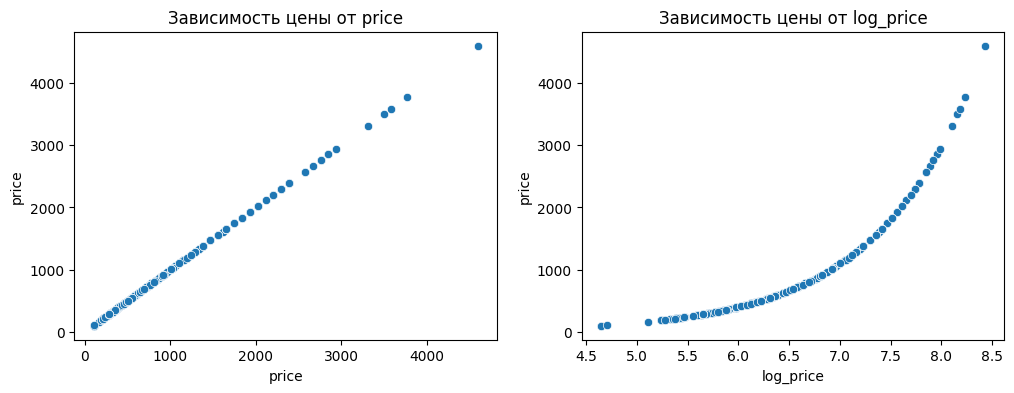

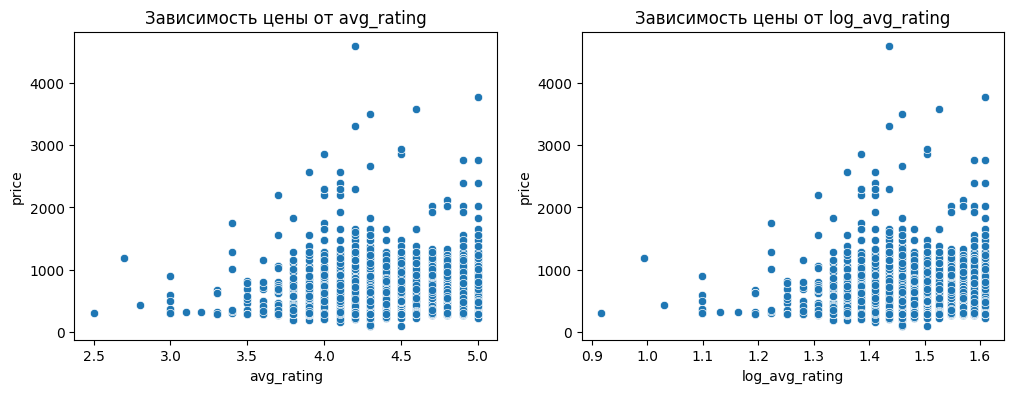

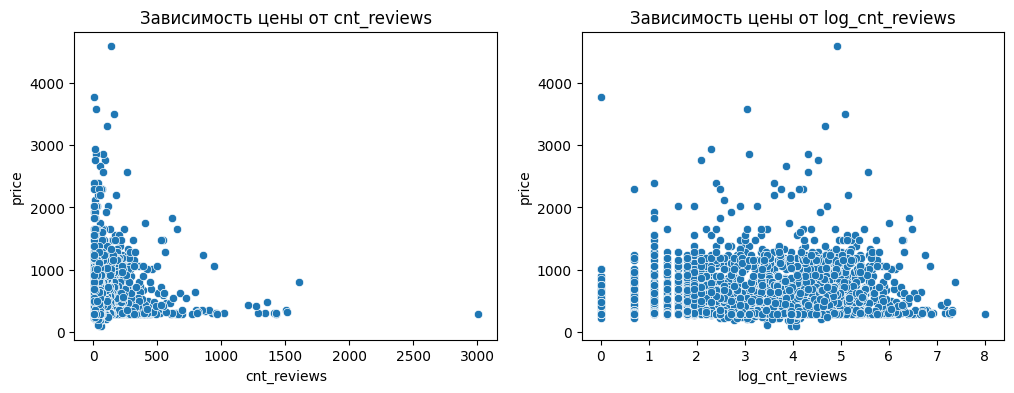

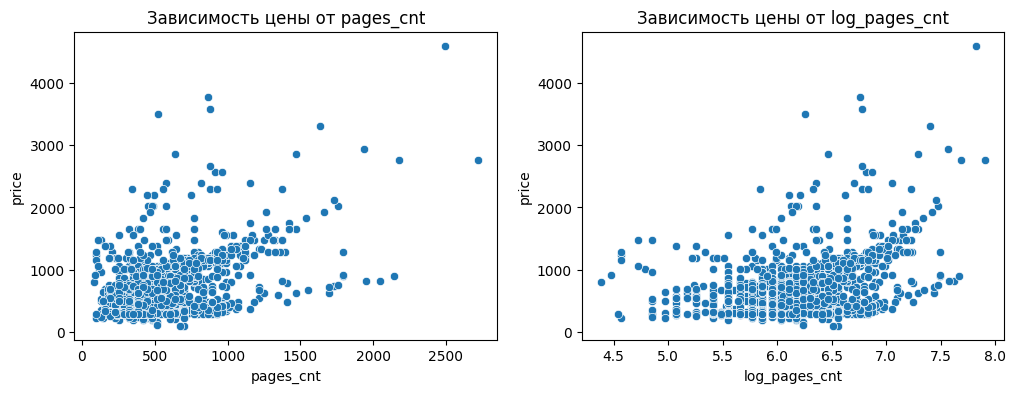

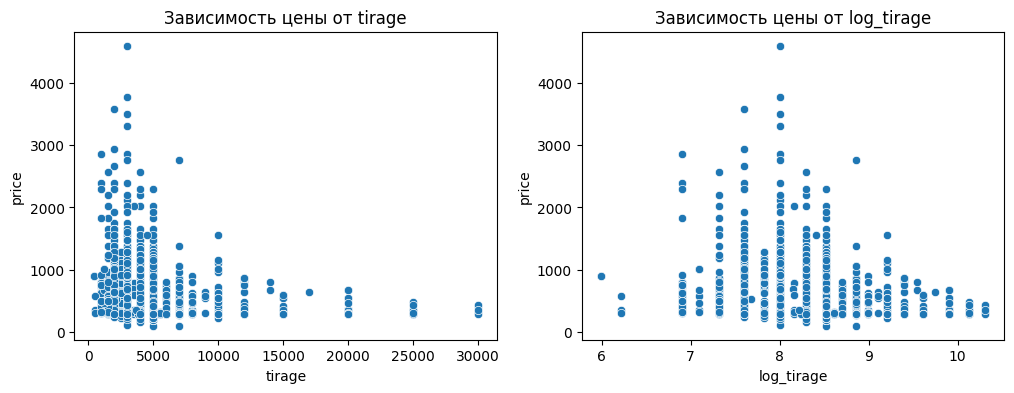

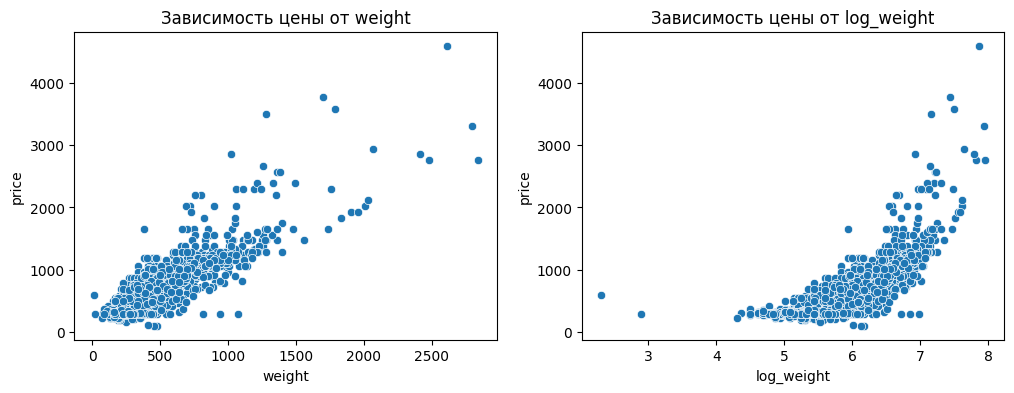

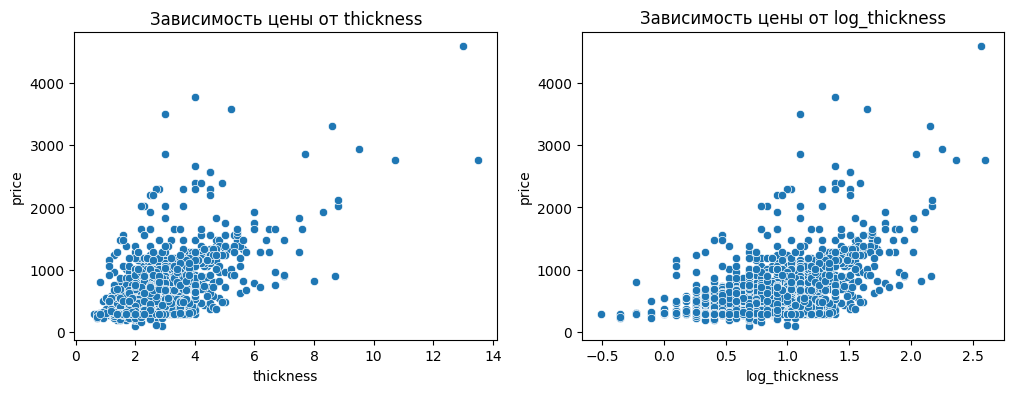

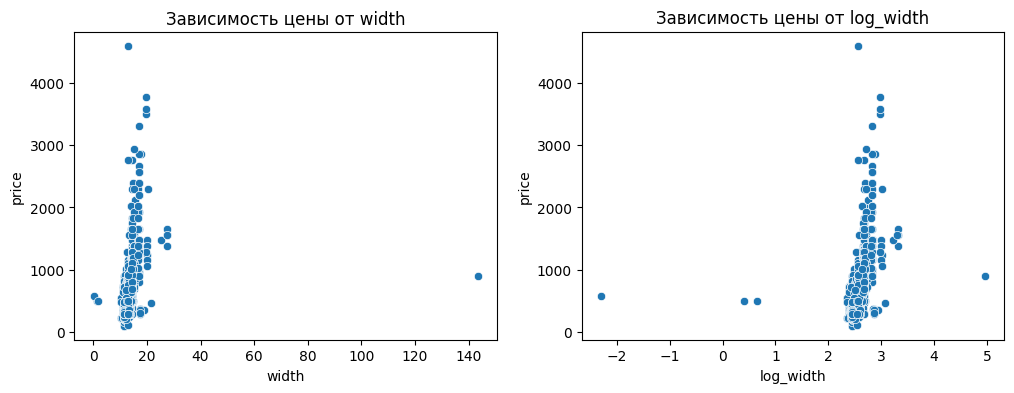

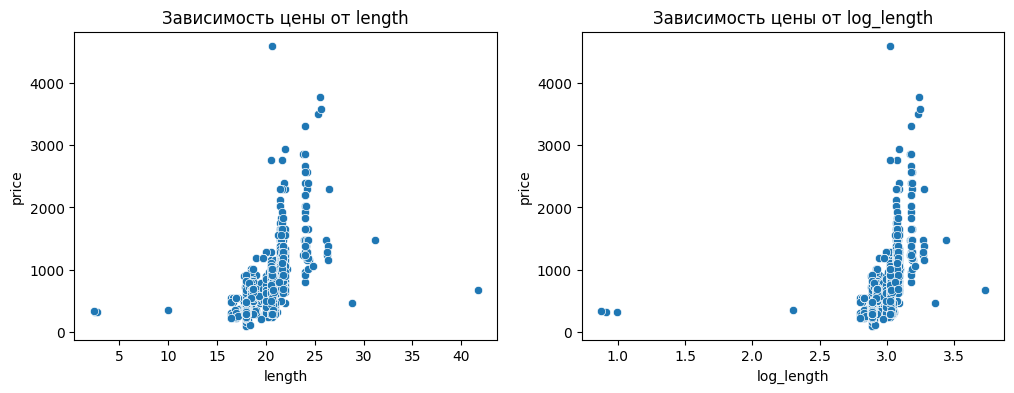

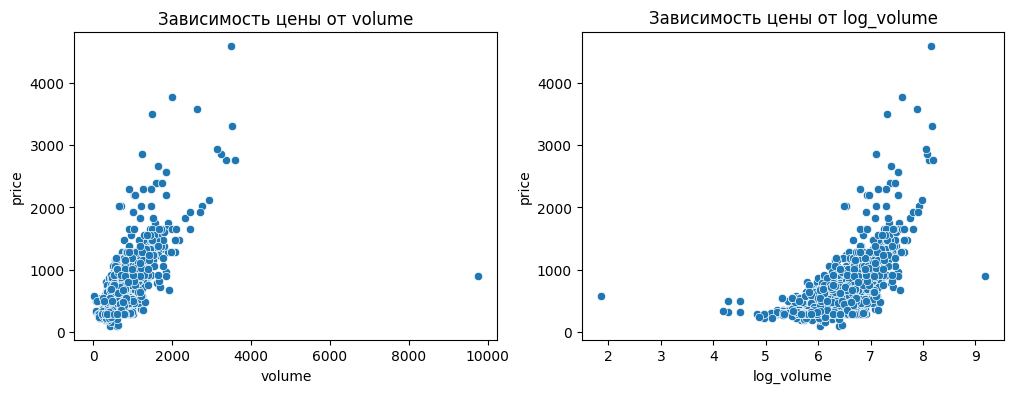

In [107]:
# Зависимость цены от числового признака
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax[0].set_title(f'Зависимость цены от {col}')
    sns.scatterplot(data=df, x=col, y='price', ax=ax[0])

    ax[1].set_title(f'Зависимость цены от {log_col}')
    sns.scatterplot(data=df, x=log_col, y='price', ax=ax[1])

    plt.show()

### Зависимость логарифма цены от числового признака

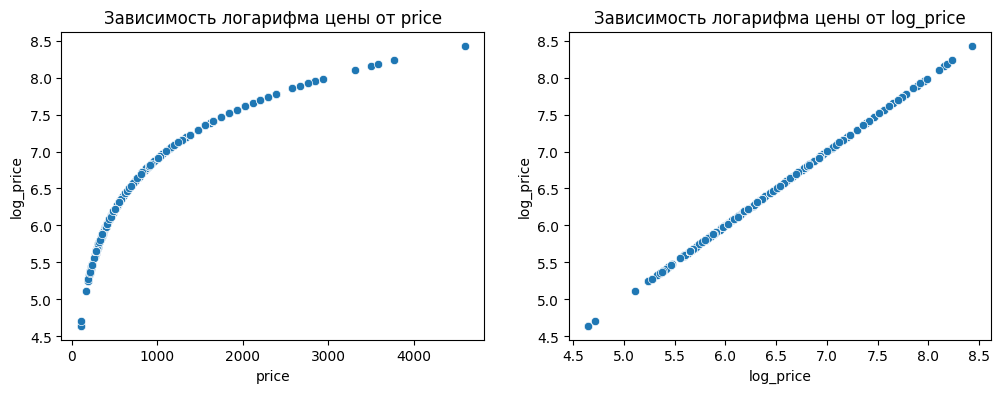

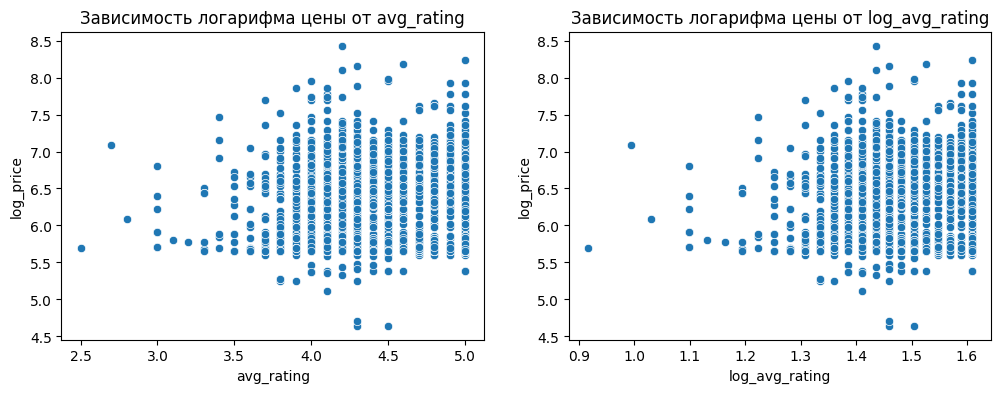

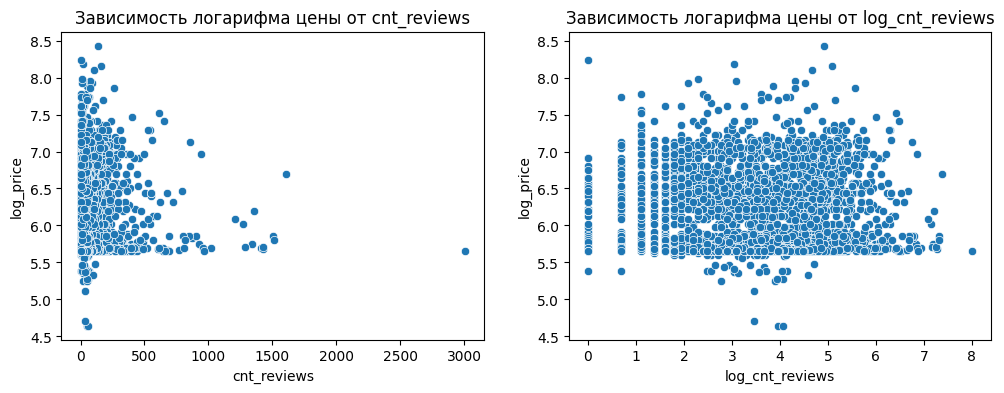

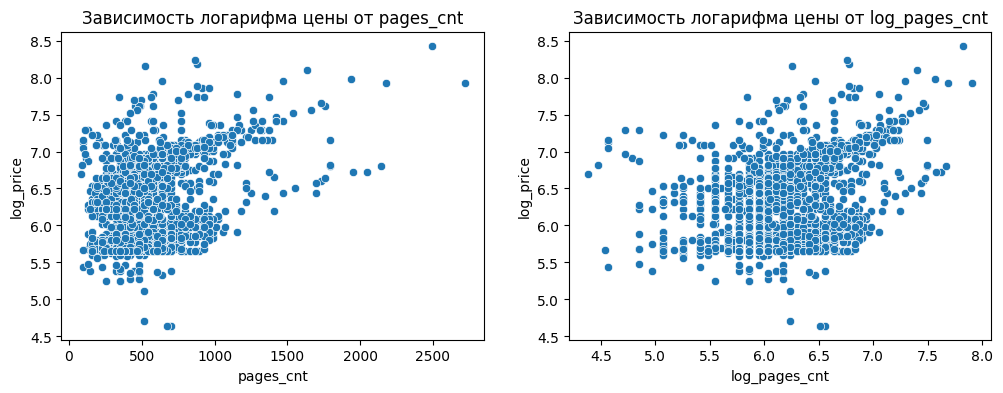

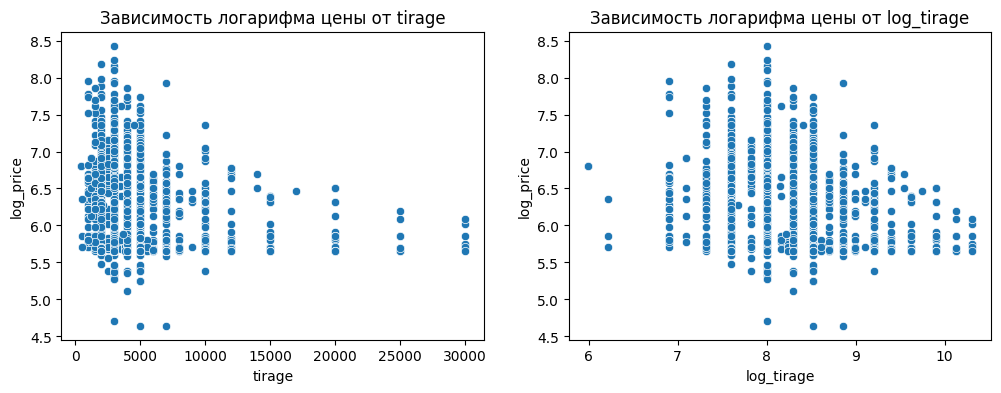

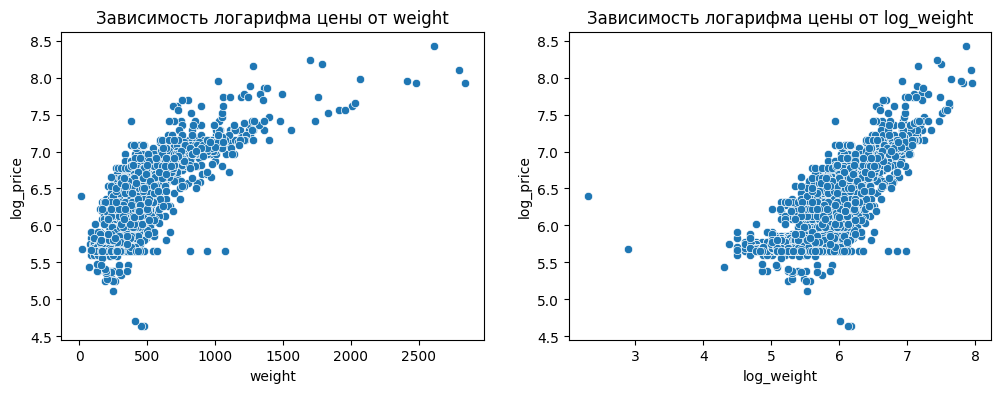

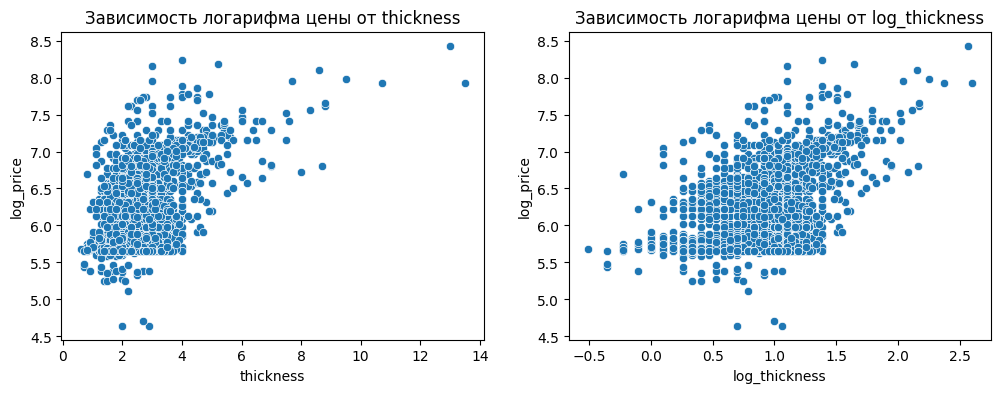

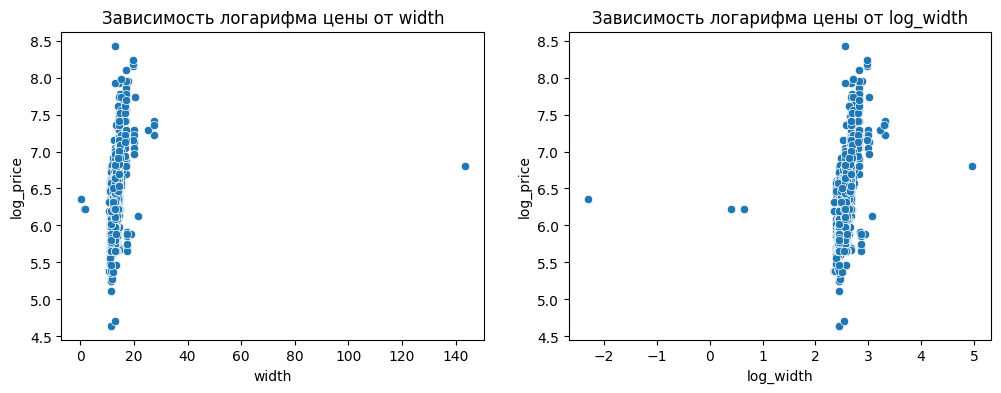

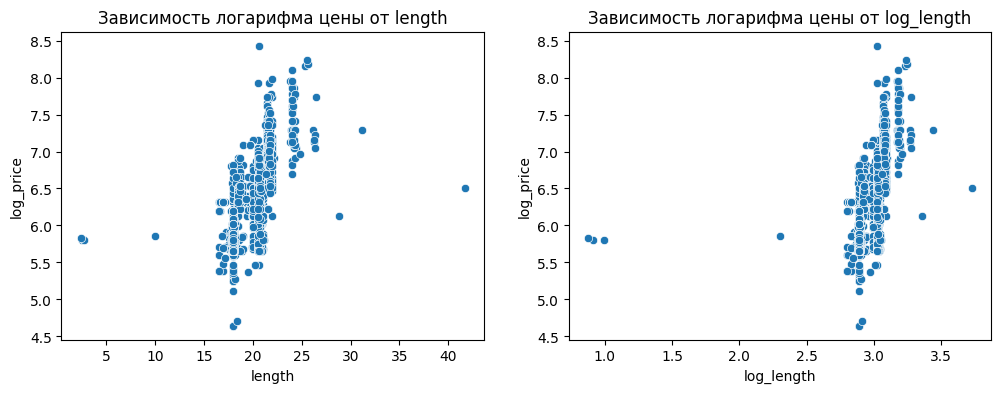

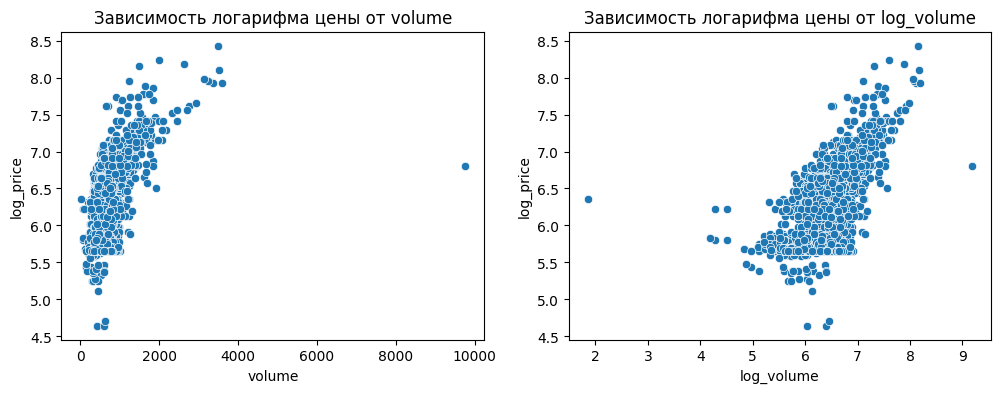

In [108]:
for col, log_col in zip(numeric_cols, log_numeric_cols):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax[0].set_title(f'Зависимость логарифма цены от {col}')
    sns.scatterplot(data=df, x=col, y='log_price', ax=ax[0])

    ax[1].set_title(f'Зависимость логарифма цены от {log_col}')
    sns.scatterplot(data=df, x=log_col, y='log_price', ax=ax[1])

    plt.show()

### Распределение цены от категориальных признаков

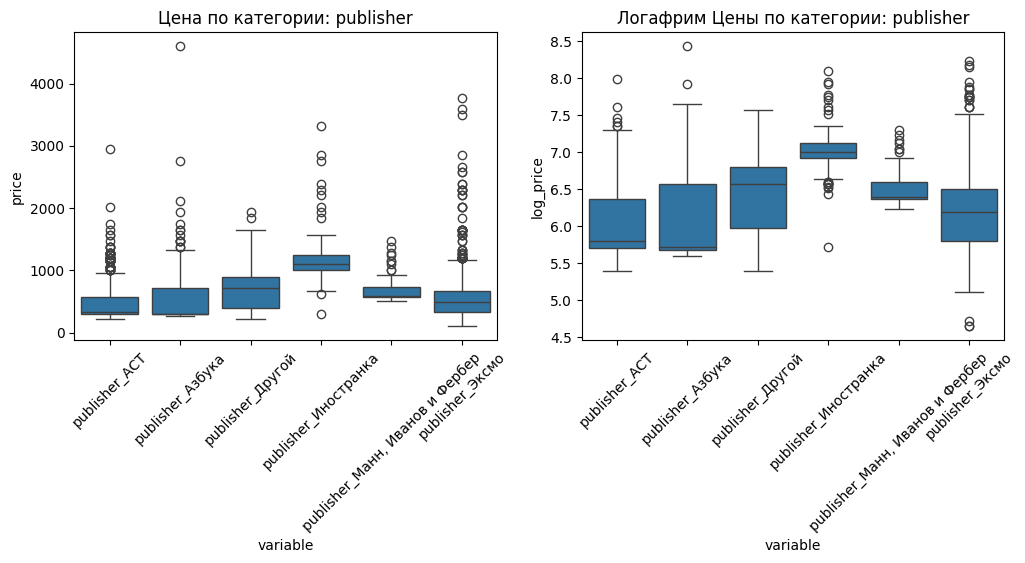

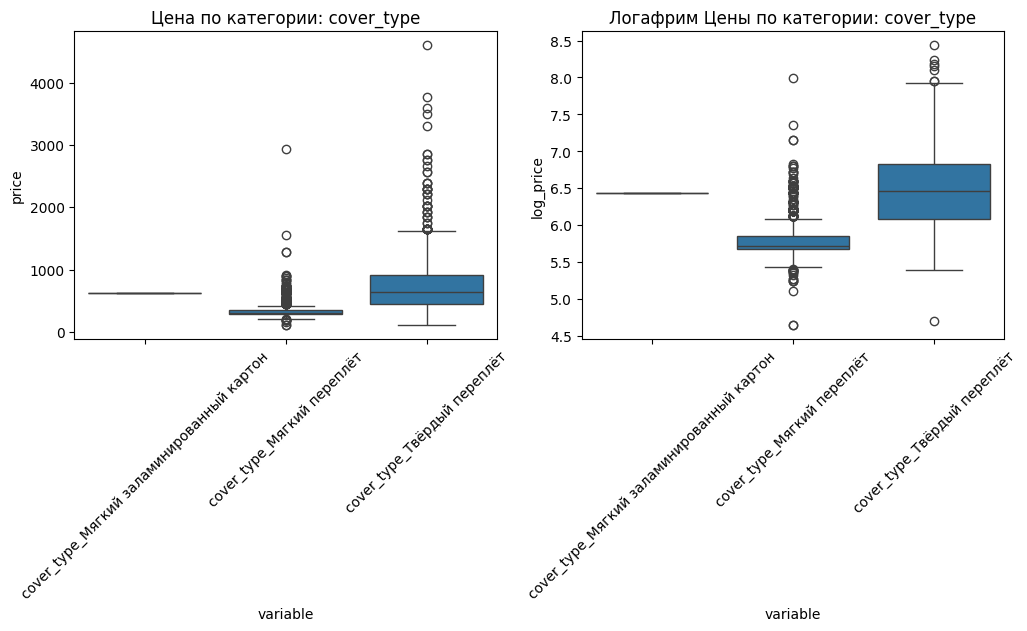

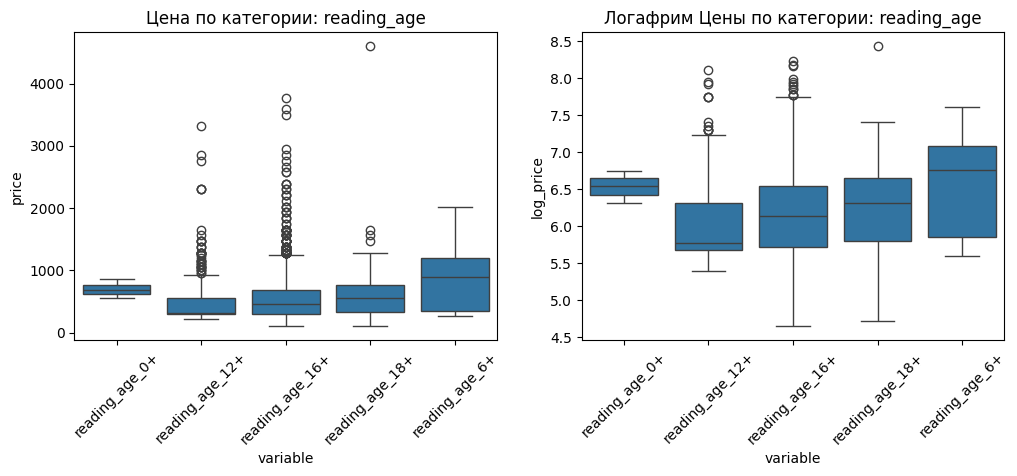

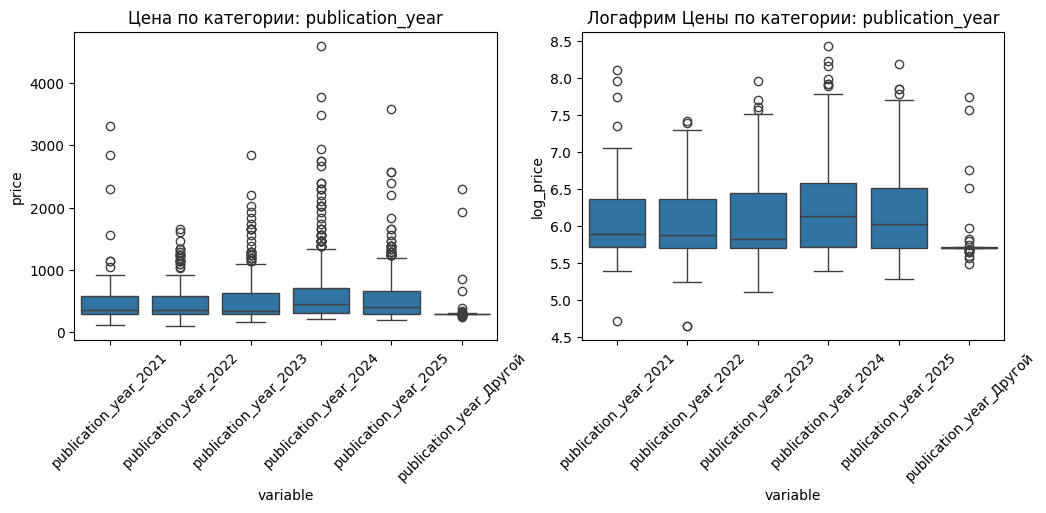

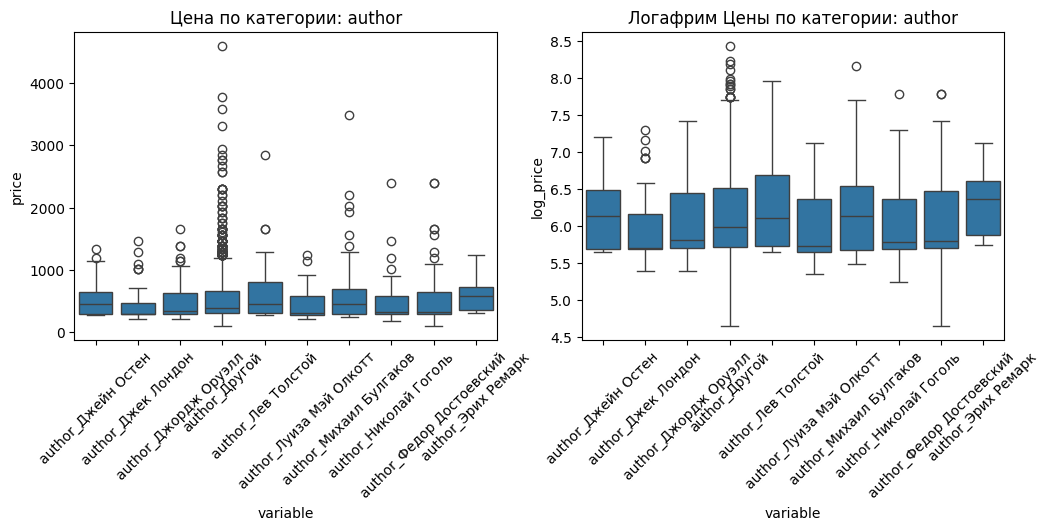

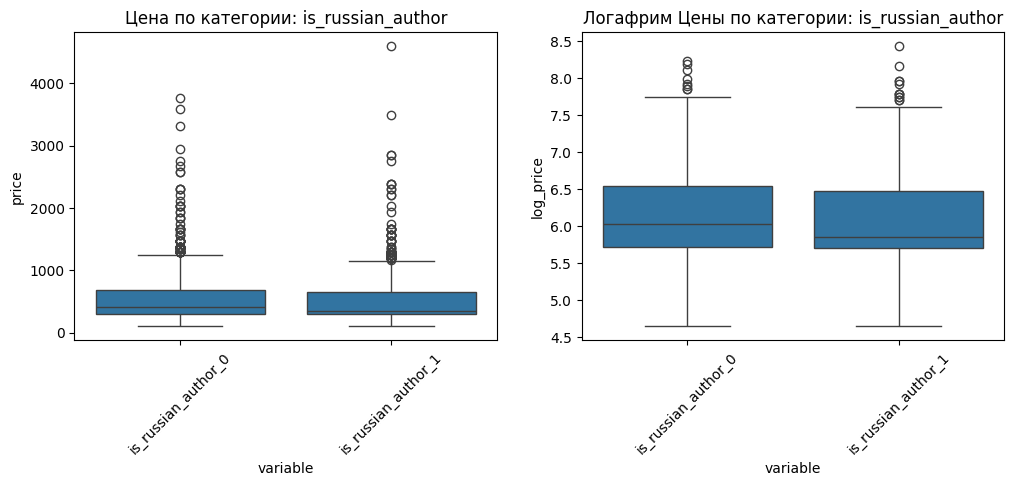

In [111]:
cat_cols = [
    [c for c in df.columns if c.startswith('publisher_')], 
    [c for c in df.columns if c.startswith('cover_type_')],
    [c for c in df.columns if c.startswith('reading_age_')],
    [c for c in df.columns if c.startswith('publication_year_')],
    [c for c in df.columns if c.startswith('author_')],
    [c for c in df.columns if c.startswith('is_russian_author')]
]
for cols in cat_cols:
    df_melt = df[cols + ['price']].melt(id_vars='price')
    df_melt = df_melt[df_melt['value'] == 1]

    df_melt_log = df[cols + ['log_price']].melt(id_vars='log_price')
    df_melt_log = df_melt_log[df_melt_log['value'] == 1]
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x='variable', y='price', data=df_melt, ax=ax[0])
    sns.boxplot(x='variable', y='log_price', data=df_melt_log, ax=ax[1])

    ax[0].tick_params(axis='x', rotation=45)
    ax[1].tick_params(axis='x', rotation=45)

    ax[0].set_title(f'Цена по категории: {"_".join(cols[0].split("_")[:-1])}')
    ax[1].set_title(f'Логафрим Цены по категории: {"_".join(cols[0].split("_")[:-1])}')

### Анализ топовых авторов

In [112]:
author_cols = [c for c in df.columns if c.startswith('author_')]
for c in author_cols:
    nm = c.split("_",1)[1]
    mean_price = df[df[c]==1]['price'].mean()
    print(f"Автор: {nm:40s} | N = {df[c].sum():4.0f} | Сред. цена: {mean_price:7.0f} руб.")

Автор: Джейн Остен                              | N =   68 | Сред. цена:     521 руб.
Автор: Джек Лондон                              | N =   71 | Сред. цена:     429 руб.
Автор: Джордж Оруэлл                            | N =   64 | Сред. цена:     536 руб.
Автор: Другой                                   | N = 2620 | Сред. цена:     551 руб.
Автор: Лев Толстой                              | N =   58 | Сред. цена:     614 руб.
Автор: Луиза Мэй Олкотт                         | N =   52 | Сред. цена:     458 руб.
Автор: Михаил Булгаков                          | N =   77 | Сред. цена:     626 руб.
Автор: Николай Гоголь                           | N =   50 | Сред. цена:     506 руб.
Автор: Федор Достоевский                        | N =  129 | Сред. цена:     527 руб.
Автор: Эрих Ремарк                              | N =   67 | Сред. цена:     579 руб.


### Зависимость цены от объема в разрезе по типу обложки

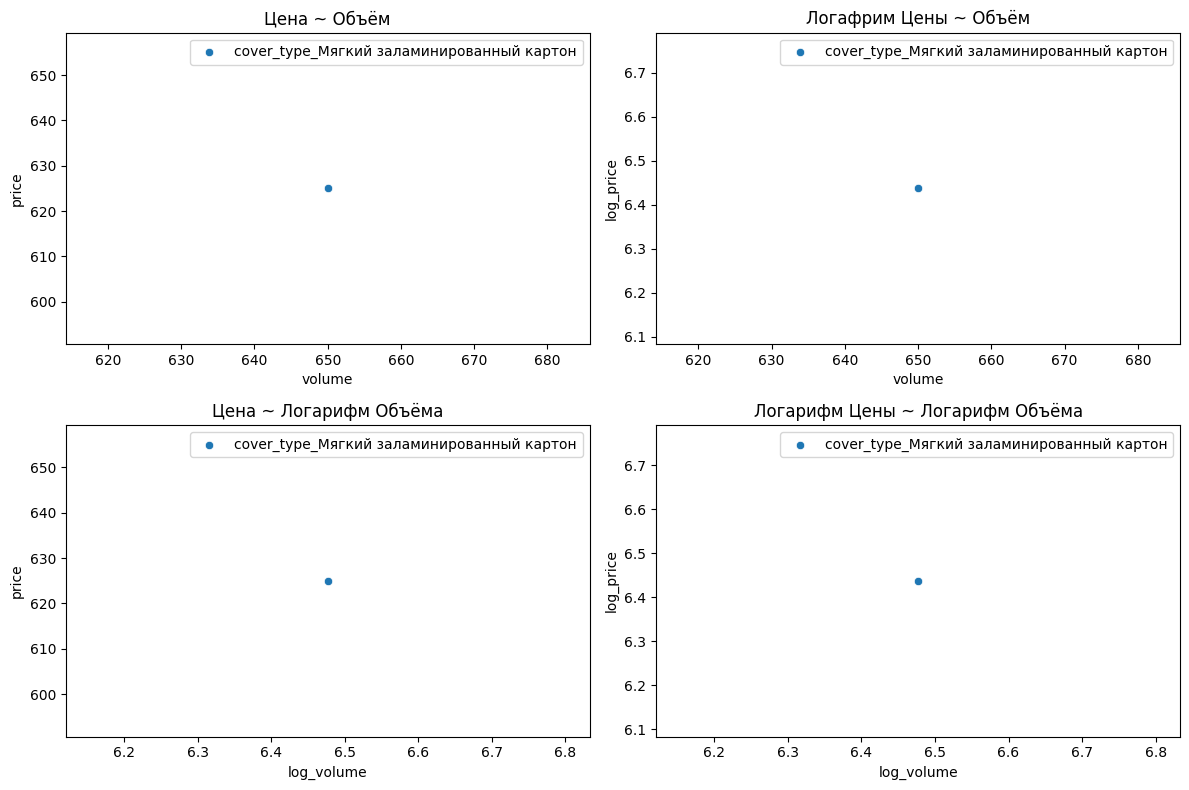

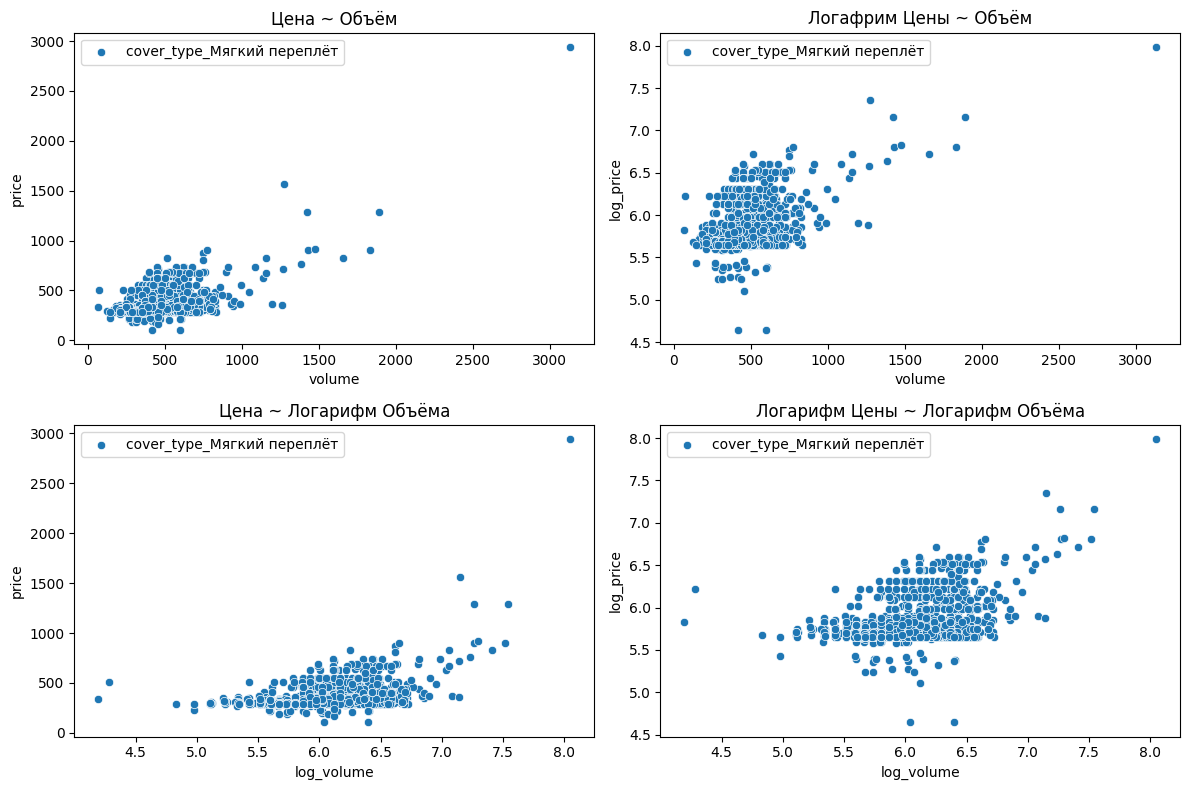

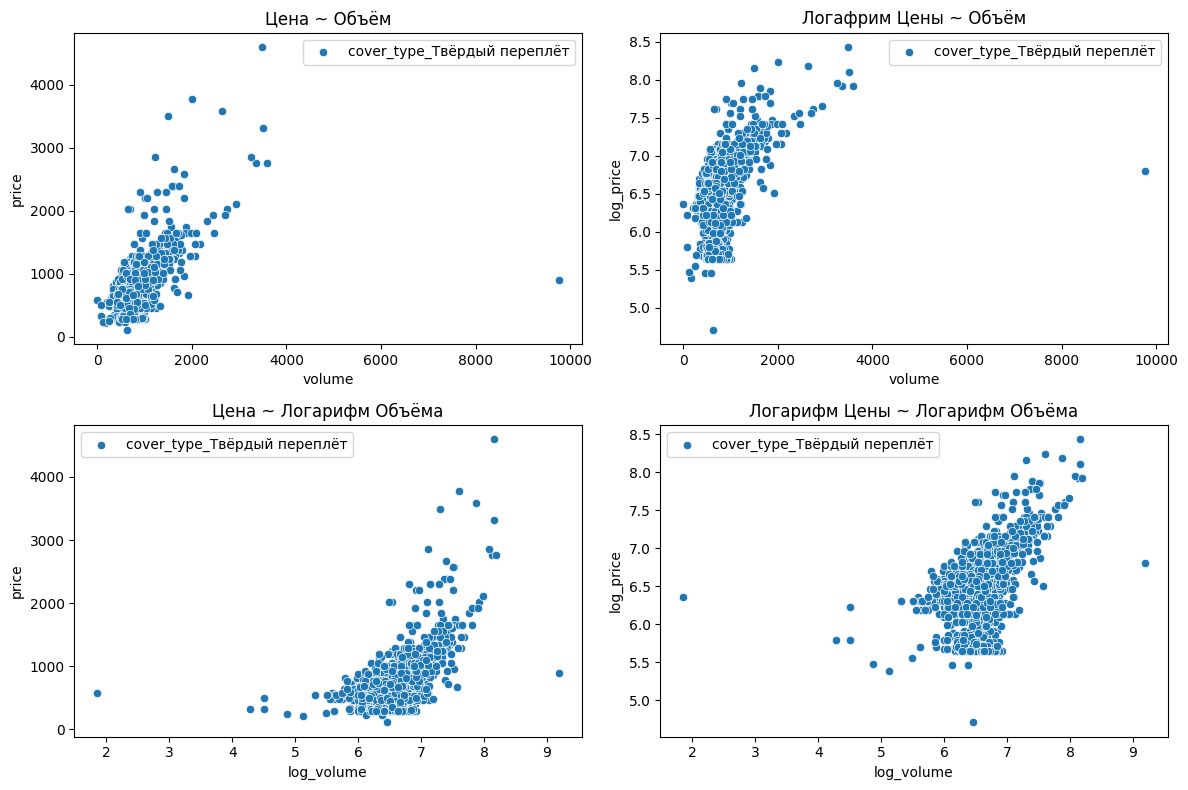

In [113]:
cover_cols = [c for c in df.columns if c.startswith('cover_type_')]
for cover in cover_cols:
    fig, ax = plt.subplots(2, 2, figsize=(12, 8))

    sns.scatterplot(x='volume', y='price', data=df[df[cover]==1], label=cover, ax=ax[0, 0])
    sns.scatterplot(x='volume', y='log_price', data=df[df[cover]==1], label=cover, ax=ax[0, 1])

    sns.scatterplot(x='log_volume', y='price', data=df[df[cover]==1], label=cover, ax=ax[1, 0])
    sns.scatterplot(x='log_volume', y='log_price', data=df[df[cover]==1], label=cover, ax=ax[1, 1])

    ax[0, 0].set_title(f"Цена ~ Объём")
    ax[0, 1].set_title(f"Логафрим Цены ~ Объём")

    ax[1, 0].set_title(f"Цена ~ Логарифм Объёма")
    ax[1, 1].set_title(f"Логарифм Цены ~ Логарифм Объёма")

    plt.tight_layout()

    # ax[0, 0].set_xlim(xmin=0, xmax = df[df[cover]==1]['volume'].quantile(0.99))
    # ax[1, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['price'].quantile(0.99))

    # ax[0, 1].set_xlim(xmin=0, xmax = df[df[cover]==1]['volume'].quantile(0.99))
    # ax[0, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['log_price'].quantile(0.99))

    # ax[1, 0].set_xlim(xmin=0, xmax = df[df[cover]==1]['log_volume'].quantile(0.99))
    # ax[1, 0].set_ylim(ymin=0, ymax = df[df[cover]==1]['price'].quantile(0.99))

    # ax[1, 1].set_xlim(xmin=0, xmax = df[df[cover]==1]['log_volume'].quantile(0.99))
    # ax[1, 1].set_ylim(ymin=0, ymax = df[df[cover]==1]['log_price'].quantile(0.99))
    
    plt.show()

### Топ дорогих и дешевых книг

In [114]:
print("ТОП-10 по цене:")
display(df[['title', 'publisher_АСТ','publisher_Азбука', 'publisher_Иностранка', 'publisher_Манн, Иванов и Фербер', 'publisher_Эксмо'] + numeric_cols].sort_values('price', ascending=False).head(10))

print("ТОП-10 по цене с конца:")
display(df[['title', 'publisher_АСТ','publisher_Азбука', 'publisher_Иностранка', 'publisher_Манн, Иванов и Фербер', 'publisher_Эксмо'] + numeric_cols].sort_values('price', ascending=False).tail(10))

ТОП-10 по цене:


title  publisher_АСТ  \
1959                  Довлатов С. Пятитомник (комплект)            0.0   
2327  Все сказки Г. Х. Андерсена. Полное собрание в ...            0.0   
671   Настоящие сказки братьев Гримм. Полное собрани...            0.0   
527   Мастер и Маргарита. Изысканное коллекционное и...            0.0   
1487                 Отверженные. Комплект в 2-х книгах            0.0   
2803                               Сон в красном тереме            1.0   
2446  12 стульев. Золотой теленок. Коллекционное илл...            0.0   
1652              Война и мир (в 2-х книгах) (комплект)            0.0   
2502                              Пятитомник (комплект)            0.0   
83                     Путешествие на Запад (в 2 томах)            0.0   

      publisher_Азбука  publisher_Иностранка  publisher_Манн, Иванов и Фербер  \
1959               1.0                   0.0                              0.0   
2327               0.0                   0.0                              0.0   
671                0.0                   0.0                              0.0   
527                0.0                   0.0                              0.0   
1487               0.0                   1.0                              0.0   
2803               0.0                   0.0                              0.0   
2446               0.0                   0.0                              0.0   
1652               0.0                   1.0                              0.0   
2502               1.0                   0.0                              0.0   
83                 0.0                   1.0                              0.0   

      publisher_Эксмо  price  avg_rating  cnt_reviews  pages_cnt  tirage  \
1959              0.0   4599         4.2          137       2496    3000   
2327              1.0   3771         5.0            1        864    3000   
671               1.0   3587         4.6           21        880    2000   
527               1.0   3495         4.3          163        520    3000   
1487              0.0   3311         4.2          107       1632    3000   
2803              0.0   2943         4.5           10       1936    2000   
2446              1.0   2851         4.5           22        640    1000   
1652              0.0   2851         4.0           75       1472    3000   
2502              0.0   2759         5.0            8       2720    3000   
83                0.0   2759         4.9           92       2176    7000   

      weight  thickness  width  length    volume  
1959  2609.0       13.0   13.0    20.6  3481.400  
2327  1700.0        4.0   19.6    25.5  1999.200  
671   1790.0        5.2   19.7    25.7  2632.708  
527   1279.0        3.0   19.6    25.3  1487.640  
1487  2799.0        8.6   17.0    24.0  3508.800  
2803  2070.0        9.5   15.0    22.0  3135.000  
2446  1019.0        3.0   17.0    24.0  1224.000  
1652  2410.0        7.7   17.7    23.8  3243.702  
2502  2840.0       13.5   13.0    20.5  3597.750  
83    2482.0       10.7   14.5    21.7  3366.755

ТОП-10 по цене с конца:


title  publisher_АСТ  publisher_Азбука  \
1894                                  Шерли            0.0               0.0   
1707                 Любовник леди Чаттерли            0.0               0.0   
2757                            Золотой жук            0.0               0.0   
1826  Загадочная история Бенджамина Баттона            0.0               0.0   
1068                                     Мы            0.0               0.0   
2219                           Мертвые души            0.0               0.0   
2319                            Мифы Ктулху            0.0               0.0   
3028                       Чудище Хоклайнов            0.0               0.0   
789                               Джейн Эйр            0.0               0.0   
806                Преступление и наказание            0.0               0.0   

      publisher_Иностранка  publisher_Манн, Иванов и Фербер  publisher_Эксмо  \
1894                   0.0                              0.0              1.0   
1707                   0.0                              0.0              1.0   
2757                   0.0                              0.0              1.0   
1826                   0.0                              0.0              1.0   
1068                   0.0                              0.0              1.0   
2219                   0.0                              0.0              1.0   
2319                   0.0                              0.0              1.0   
3028                   0.0                              0.0              1.0   
789                    0.0                              0.0              1.0   
806                    0.0                              0.0              1.0   

      price  avg_rating  cnt_reviews  pages_cnt  tirage  weight  thickness  \
1894    205         4.2           99        640    3000   310.0        2.5   
1707    195         3.8           58        480    3000   240.0        2.0   
2757    195         3.8           51        416    3000   202.0        1.7   
1826    189         4.3           16        352    5000   260.0        1.5   
1068    189         3.8           49        256    5000   190.0        1.4   
2219    189         3.9           49        352    5000   246.0        2.1   
2319    165         4.1           32        512    4000   250.0        2.2   
3028    111         4.3           32        512    3000   409.0        2.7   
789     104         4.5           53        704    7000   480.0        2.0   
806     104         4.3           58        672    5000   458.0        2.9   

      width  length   volume  
1894   11.7    18.0  526.500  
1707   11.5    18.0  414.000  
2757   11.7    18.2  361.998  
1826   11.5    18.0  310.500  
1068   11.5    18.0  289.800  
2219   11.5    18.0  434.700  
2319   11.5    18.0  455.400  
3028   12.8    18.4  635.904  
789    11.6    18.0  417.600  
806    11.5    18.0  600.300

### Pairplot для быстрых выводов

In [ ]:
sns.pairplot(df);